# Goal

* Stand-alone generation of selected figures for the manuscript (Nearest Balance plots using the unified palette, etc.)
* Tweaking of the fig_maker allows to produce various versions of the figures for the publication.

# Var

In [28]:
work_dir = ".."

# quasifactors (not only the factors, but also the Rounds.. per TreamentID)
qfactors_plots_n_tables = c( "Rounds of transfer" = "Generation_num", 
                            "Rounds of transfer (Selection group)" = "Generation_num_Selection", 
                            "Rounds of transfer (Control group)" = "Generation_num_Control", 
                            "Selection" = "Generation_num_TreatmentID",
                            "Distance traveled" = "dist_trav",
                            "Indolelactic acid" = "Indolelactic_acid"
                            )

# and the inside-out version
qfactors_plots_n_tables_inv = names(qfactors_plots_n_tables)
names(qfactors_plots_n_tables_inv) = unlist(qfactors_plots_n_tables)

# Note: rendering of per-group (subgroup) NB plots is not fully automated, and works as follows: for each subgroup, 
# - select the subgroup by uncommenting the respective line in selection_mice_metab.ipynb ("filtering ..." subsection)
# - run that notebook to generate 2 files including the respective NB info
# - run this notebook to generate the plot for that subgroup
# - roll back the comments

In [29]:
# list of all taxonomic ranks at which the NB files will be loaded and plots will be built
ALL_USED_TAXONOMIC_LEVELS = c("Species", "Genus")

# list of all taxonomic profiling approaches, similarly.
ALL_USED_TAXONOMIC_PROFILING = c("bracken", "krakenuniq")

# Init

In [30]:
library(LeyLabRMisc)
library(tidytable)
library(ggplot2)
library(ggsci)
library(tidyr)
library(readr)
library(ggpubr)
library(purrr)

In [31]:
df.dims(5)

# Load

In [32]:
# available combos
df.dims(20)
combos = expand_grid(fac = qfactors_plots_n_tables, prof = ALL_USED_TAXONOMIC_PROFILING, tax_level = ALL_USED_TAXONOMIC_LEVELS) %>%     
    mutate(file_exists = file.exists(file.path(work_dir, "out/NB", paste0("NB_Exp_2_families_set_", fac, "_", tax_level, "_", prof, ".tsv")))) %>% 
    filter(file_exists) %>% 
    select(-file_exists) %>% 
    arrange(prof, tax_level, fac)
combos
df.dims(5)

fac,prof,tax_level
<chr>,<chr>,<chr>
Generation_num,bracken,Genus
Generation_num_Control,bracken,Genus
Generation_num_Selection,bracken,Genus
Generation_num_TreatmentID,bracken,Genus
Indolelactic_acid,bracken,Genus
dist_trav,bracken,Genus
Generation_num,bracken,Species
Generation_num_Control,bracken,Species
Generation_num_Selection,bracken,Species


In [33]:
# load all files from "out" folder whose name starts with 
nb_families = pmap_dfr(combos, function(fac, prof, tax_level) {
						read_tsv(file.path(work_dir, "out/NB", paste0("NB_Exp_2_families_set_", fac, "_", 
											tax_level, "_", prof, ".tsv")), col_names = FALSE, col_types = "c")
						}) %>%
					distinct() %>% pull()

nb_families
length(nb_families)

[1] "CHK158-818"           "Acidaminococcaceae"   "Rikenellaceae"       
 [4] "Desulfovibrionaceae"  "Oscillospiraceae"     "Eggerthellaceae"     
 [7] "Lachnospiraceae"      "Enterobacteriaceae"   "Acutalibacteraceae"  
[10] "Lactobacillaceae"     "UBA932"               "Erysipelotrichaceae" 
[13] "Marinifilaceae"       "UBA660"               "P3"                  
[16] "Ruminococcaceae"      "CAG-274"              "Muribaculaceae"      
[19] "Bacteroidaceae"       "RUG14156"             "Butyricicoccaceae"   
[22] "Nanosyncoccaceae"     "Borkfalkiaceae"       "CAG-552"             
[25] "Anaerotignaceae"      "Anaerovoracaceae"     "Tannerellaceae"      
[28] "Gastranaerophilaceae" "UBA5755"

[1] 29

# Analysis

## Figures

### Preparations

In [34]:
fams_sel_pal = c("Lachnospiraceae" = "#C75127FF", # brick
				"Lactobacillaceae" =  "#0A47FFFF", #deepblue
				"Muribaculaceae" = "#5DB1DDFF", #turq
				"Eggerthellaceae" =  "#D595A7FF",
				"Bacteroidaceae" = "#FFC20AFF", #light orange
				"Marinifilaceae" = "#6BD76BFF", #cyan
				"Rikenellaceae" = "#f0e685",
				"Desulfovibrionaceae" = "#E4AF69FF",
				"CHK158-818" = "#660099FF",
				"Oscillospiraceae" = "#A9A9A9FF"
				)
fams_sel_pal

Lachnospiraceae    Lactobacillaceae      Muribaculaceae     Eggerthellaceae 
        "#C75127FF"         "#0A47FFFF"         "#5DB1DDFF"         "#D595A7FF" 
     Bacteroidaceae      Marinifilaceae       Rikenellaceae Desulfovibrionaceae 
        "#FFC20AFF"         "#6BD76BFF"           "#f0e685"         "#E4AF69FF" 
         CHK158-818    Oscillospiraceae 
        "#660099FF"         "#A9A9A9FF"

In [35]:
fams_other = setdiff(nb_families, names(fams_sel_pal))
fams_other

[1] "Acidaminococcaceae"   "Enterobacteriaceae"   "Acutalibacteraceae"  
 [4] "UBA932"               "Erysipelotrichaceae"  "UBA660"              
 [7] "P3"                   "Ruminococcaceae"      "CAG-274"             
[10] "RUG14156"             "Butyricicoccaceae"    "Nanosyncoccaceae"    
[13] "Borkfalkiaceae"       "CAG-552"              "Anaerotignaceae"     
[16] "Anaerovoracaceae"     "Tannerellaceae"       "Gastranaerophilaceae"
[19] "UBA5755"

In [36]:
free_cols = setdiff(pal_igv("default")(51), fams_sel_pal)

set.seed(3)
fams_other_pal = sample(free_cols, length(fams_other), replace = FALSE)
names(fams_other_pal) = fams_other
#fams_other_pal

In [37]:
all_fams_pal = c(fams_sel_pal, fams_other_pal)
all_fams_pal

Lachnospiraceae     Lactobacillaceae       Muribaculaceae 
         "#C75127FF"          "#0A47FFFF"          "#5DB1DDFF" 
     Eggerthellaceae       Bacteroidaceae       Marinifilaceae 
         "#D595A7FF"          "#FFC20AFF"          "#6BD76BFF" 
       Rikenellaceae  Desulfovibrionaceae           CHK158-818 
           "#f0e685"          "#E4AF69FF"          "#660099FF" 
    Oscillospiraceae   Acidaminococcaceae   Enterobacteriaceae 
         "#A9A9A9FF"          "#466983FF"          "#3B1B53FF" 
  Acutalibacteraceae               UBA932  Erysipelotrichaceae 
         "#990080FF"          "#00991AFF"          "#924822FF" 
              UBA660                   P3      Ruminococcaceae 
         "#33CC00FF"          "#D58F5CFF"          "#FF1463FF" 
             CAG-274             RUG14156    Butyricicoccaceae 
         "#14FFB1FF"          "#CE3D32FF"          "#809900FF" 
    Nanosyncoccaceae       Borkfalkiaceae              CAG-552 
         "#00D68FFF"          "#CDDEB7FF"          "#009966FF" 
     Anaerotignaceae     Anaerovoracaceae       Tannerellaceae 
         "#008099FF"          "#991A00FF"          "#837B8DFF" 
Gastranaerophilaceae              UBA5755 
         "#4775FFFF"          "#00CC99FF"

In [38]:
length(all_fams_pal)

[1] 29

In [39]:
for(sel_factor in qfactors_plots_n_tables) {
	print(sel_factor)
}

[1] "Generation_num"
[1] "Generation_num_Selection"
[1] "Generation_num_Control"
[1] "Generation_num_TreatmentID"
[1] "dist_trav"
[1] "Indolelactic_acid"


In [40]:
list_nb_reprod_coef = pmap_dfr(combos, function(fac, prof, tax_level) {						
							fp = file.path(work_dir, "out/NB", paste0("NB_Exp_2_coef_", fac, "_", tax_level, "_", prof, ".rds"))
							readRDS(fp) %>% mutate(factor = fac, profiling = prof, taxonomic_level = tax_level)
						}
)
list_nb_reprod_coef

taxName,b1,reprod,lm_coef,Family,taxName_ext,factor,profiling,taxonomic_level
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Gallibacteroides,1,1.00,0.6589393,CHK158-818,Gallibacteroides,Generation_num,bracken,Genus
Phascolarctobacterium_A,-1,0.81,-0.2249095,Acidaminococcaceae,Phascolarctobacterium_A,Generation_num,bracken,Genus
DSM-108975,1,1.00,0.6014033,Rikenellaceae,DSM-108975,Generation_num,bracken,Genus
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
N1__maxbin2__Low_130_sub,1,0.93,0.003650948,Muribaculaceae,N1__maxbin2__Low_130_sub; UBA7173 sp013316675,dist_trav,krakenuniq,Species
R3_N5_Control__maxbin2__High_020,-1,0.94,-0.002426317,Rikenellaceae,R3_N5_Control__maxbin2__High_020; Alistipes sp910576555,dist_trav,krakenuniq,Species


In [41]:
# pseudo balance put together just for the sake of the legend plotting
pseudo_nb = list_nb_reprod_coef
pseudo_nb %>% select(Family) %>% distinct()
pseudo_nb

Family
<chr>
CHK158-818
Acidaminococcaceae
Rikenellaceae
⋮
Gastranaerophilaceae
UBA5755


taxName,b1,reprod,lm_coef,Family,taxName_ext,factor,profiling,taxonomic_level
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Gallibacteroides,1,1.00,0.6589393,CHK158-818,Gallibacteroides,Generation_num,bracken,Genus
Phascolarctobacterium_A,-1,0.81,-0.2249095,Acidaminococcaceae,Phascolarctobacterium_A,Generation_num,bracken,Genus
DSM-108975,1,1.00,0.6014033,Rikenellaceae,DSM-108975,Generation_num,bracken,Genus
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
N1__maxbin2__Low_130_sub,1,0.93,0.003650948,Muribaculaceae,N1__maxbin2__Low_130_sub; UBA7173 sp013316675,dist_trav,krakenuniq,Species
R3_N5_Control__maxbin2__High_020,-1,0.94,-0.002426317,Rikenellaceae,R3_N5_Control__maxbin2__High_020; Alistipes sp910576555,dist_trav,krakenuniq,Species


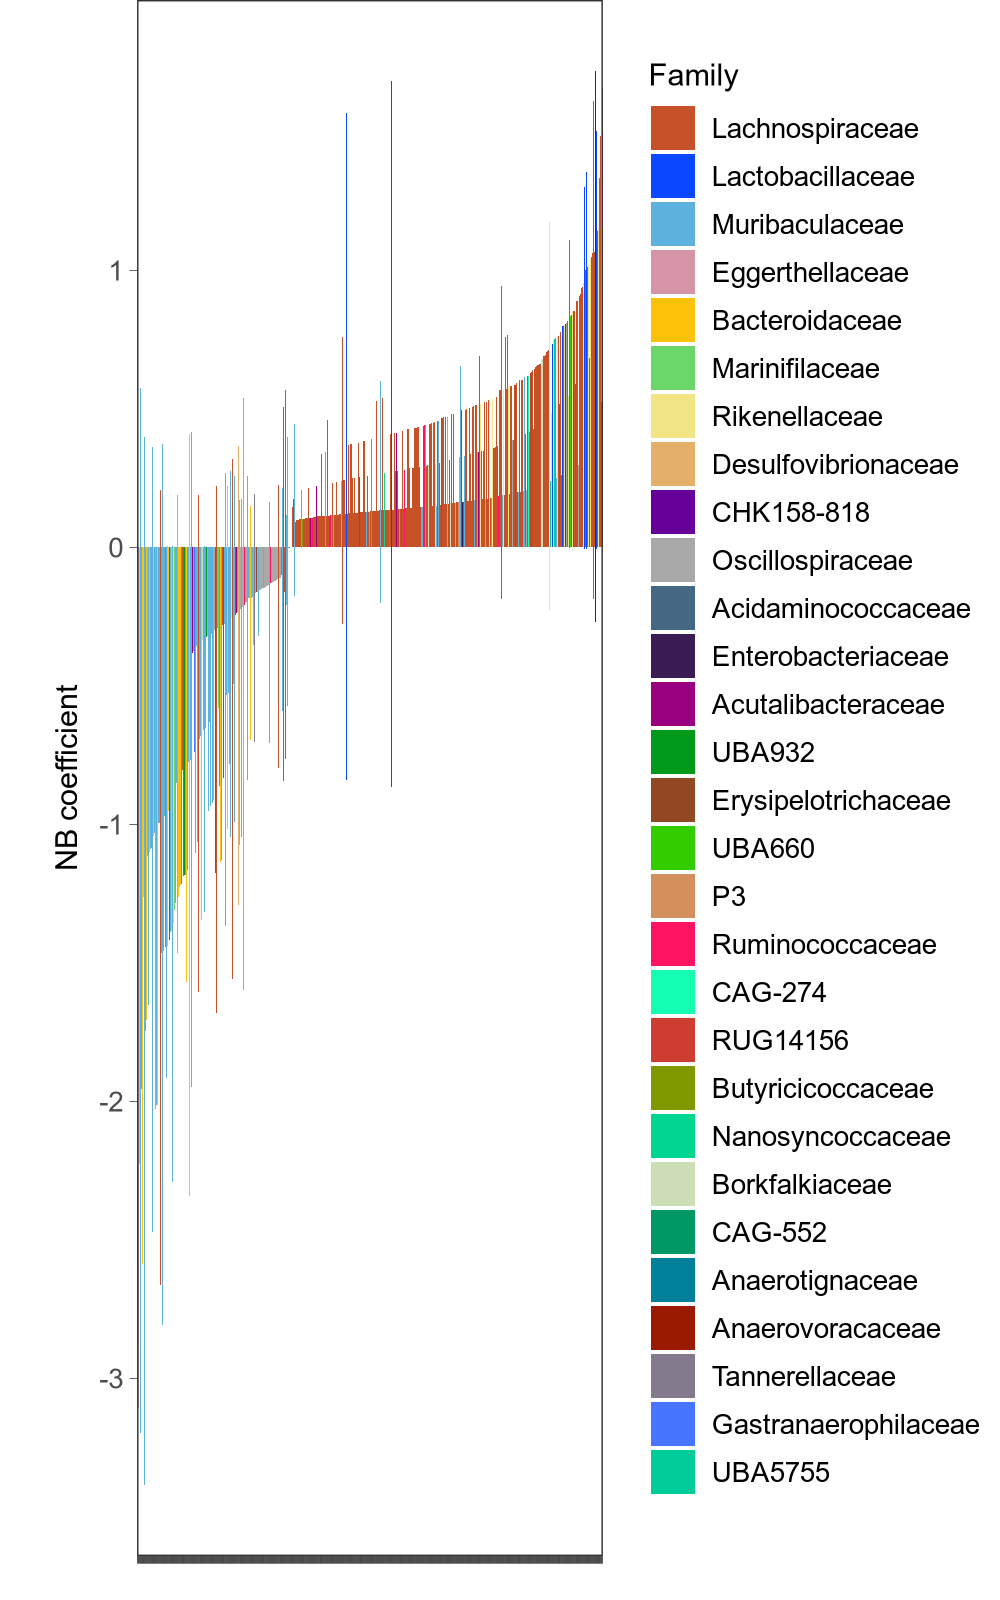

In [42]:
# draw a pseudo-NB -- solely for getting the legend

p.dims(5, 8)
ggplot(pseudo_nb, aes(x = lm_coef, y = reorder(taxName, lm_coef), fill = Family)) +			
	geom_bar(stat = "identity", width = 1) +
	
	theme_bw() +		
	
	theme(axis.text = element_text(size = 10)) +	
	labs(x = "NB coefficient", y = "") + 	
	# rotate labels
	theme(
		#axis.text.x = element_text(angle = 60, hjust = 1), 
		axis.text.x = element_blank(), 
		plot.margin = margin(l = 20)) +
		
	
	# rotate the plot 90 degrees
	coord_flip() + 

	# set a palette for the fill		
	scale_fill_manual(values = all_fams_pal, breaks = names(all_fams_pal)) +

	# legend text		
	theme(legend.text = element_text(size = 10)) +

	theme(
		#panel.border = element_blank(),
		panel.grid.major = element_blank(),
		panel.grid.minor = element_blank(),
		axis.line = element_line(colour = "black", linewidth = 0),
		axis.ticks = element_line(colour = "black", linewidth = 0.1),
		plot.title = element_text(hjust = 0.5, face = "bold")		
	) +
	guides(fill=guide_legend(ncol=1))



In [43]:
fig_maker = function(fac, prof, tax_level) {

	pic = ggplot(list_nb_reprod_coef %>% filter(factor == fac, profiling == prof, taxonomic_level == tax_level), aes(x = lm_coef, y = reorder(taxName_ext, lm_coef), fill = Family)) +			
		#geom_bar(stat = "identity", width = 1) +
		geom_bar(stat = "identity") +

		theme_bw() +		
		
		theme(axis.text = element_text(size = 10)) +	
		labs(x = "Taxon coefficient", y = "") + 	
		# rotate labels
		theme(
			## enable tilted labels
			axis.text.x = element_text(size = 7, 

				# default:
				#angle = 60, 
				# for MAGs (labels are longer)
				angle = 70, 

				hjust = 1), 
			plot.margin = margin(l = 40)

			# or disable labels
			#axis.text.x = element_blank(), 
			#plot.margin = margin(l = 20)
			) +

		# This line can be toggled on/off:			
		ggtitle(qfactors_plots_n_tables_inv[[fac]]) +				

		# rotate the plot 90 degrees
		coord_flip() + 

		# set a palette for the fill		
		#scale_fill_manual(values = all_fams_pal) +
		scale_fill_manual(values = all_fams_pal, breaks = names(all_fams_pal)) +

		## legend (text), OR		
		#theme(legend.text = element_text(size = 8), legend.position = "right") +
		#theme(legend.text = element_text(size = 8), legend.position = "bottom") +
		# legend OFF
		theme(legend.position = "none") +

		theme(
			#panel.border = element_blank(),
			panel.grid.major = element_blank(),
			panel.grid.minor = element_blank(),
			axis.line = element_line(colour = "black", linewidth = 0),
			axis.ticks = element_line(colour = "black", linewidth = 0.1),
			plot.title = element_text(hjust = 0.5, face = "bold"),

			strip.background = element_blank(),
			strip.text.x = element_blank(),
			panel.border = element_rect(colour = "black", linewidth = 1),

			axis.text.x = element_text(size = 8, color = "black"),
			axis.text.y = element_text(size = 9, face = "bold", color = "black"),
			axis.title.x = element_text(size = 10, face = "bold", color = "black"),
			axis.title.y = element_text(size = 10, face = "bold", color = "black")
			
			)
	
	#pic
}

In [44]:
pics = compact(pmap(combos, fig_maker))
pics = set_names(pics, paste0(combos$fac, "_", combos$tax_level, "_", combos$prof))

### bracken, Genus

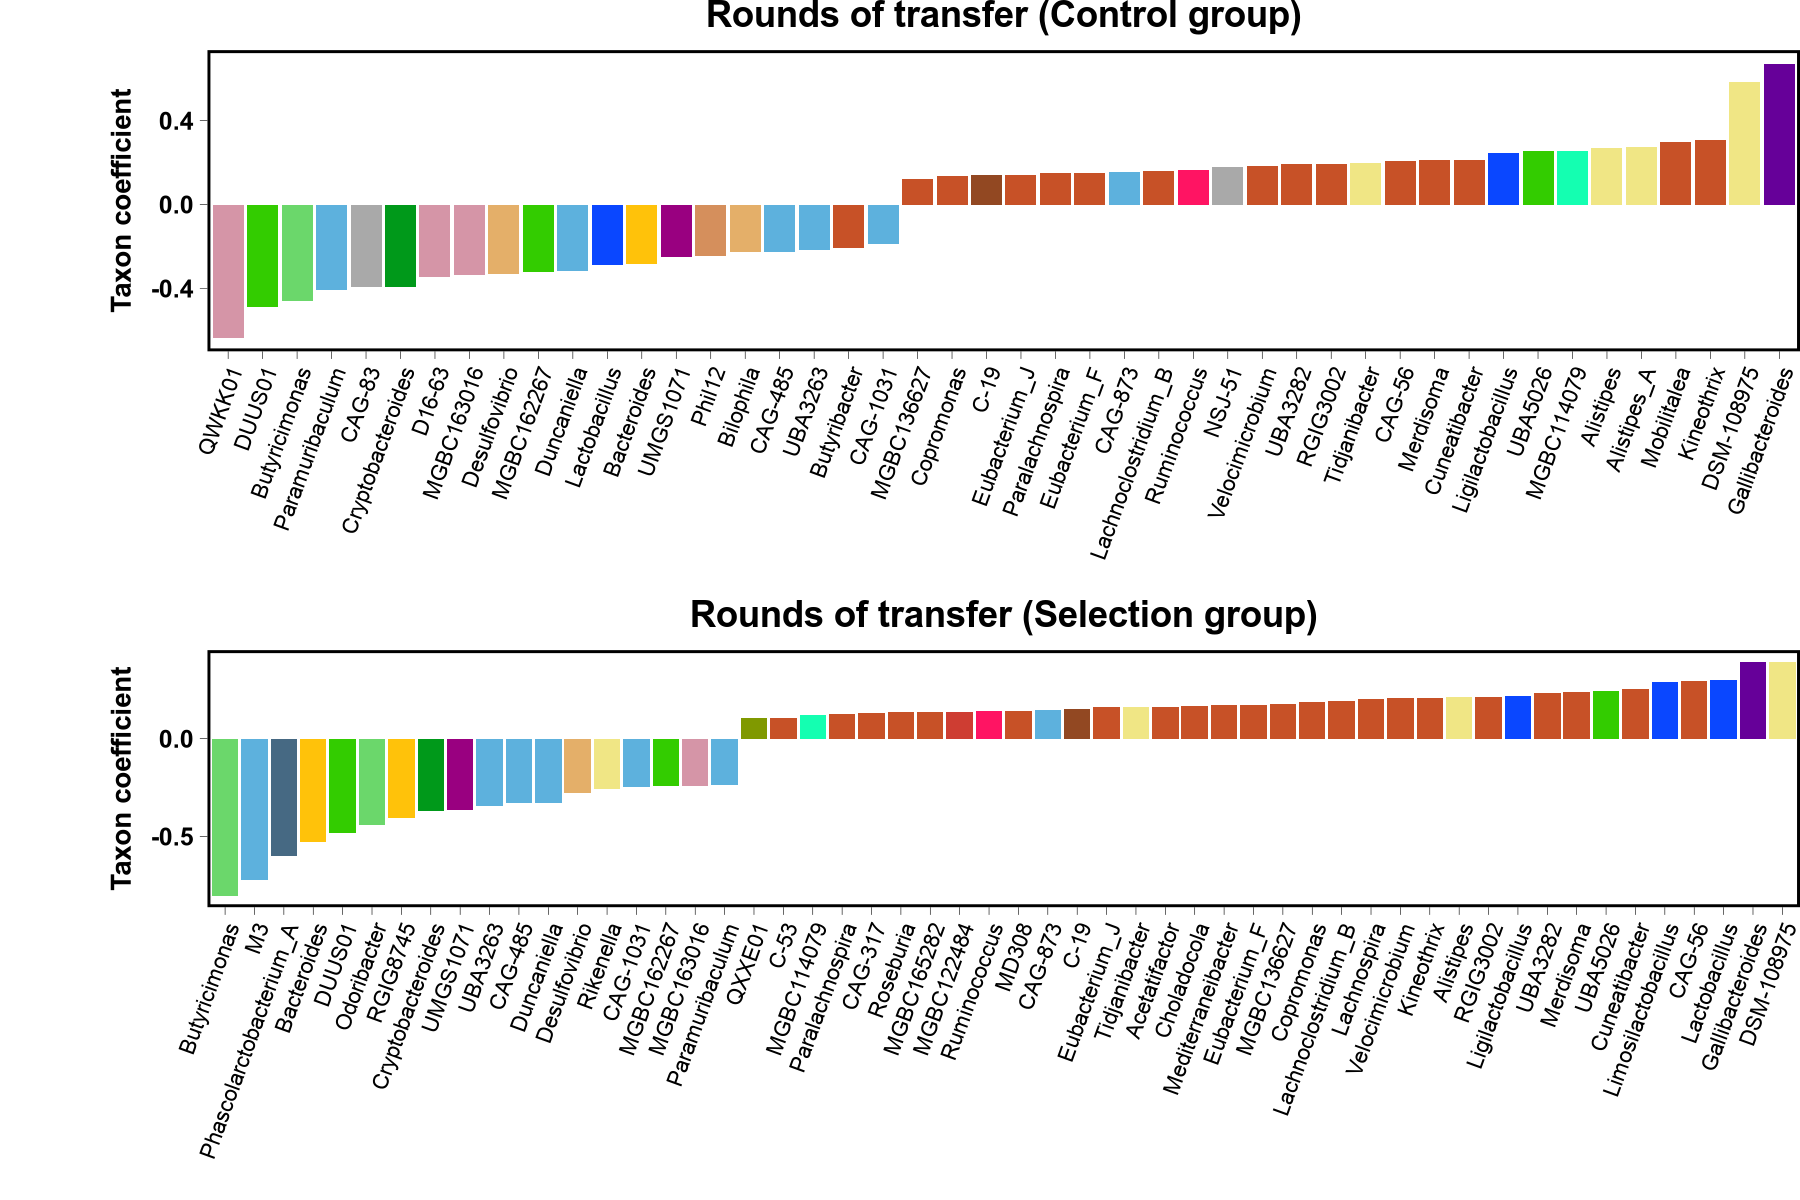

In [45]:
p.dims(9, 6)
ggarrange(pics[["Generation_num_Control_Genus_bracken"]], pics[["Generation_num_Selection_Genus_bracken"]], ncol=1, nrow=2)

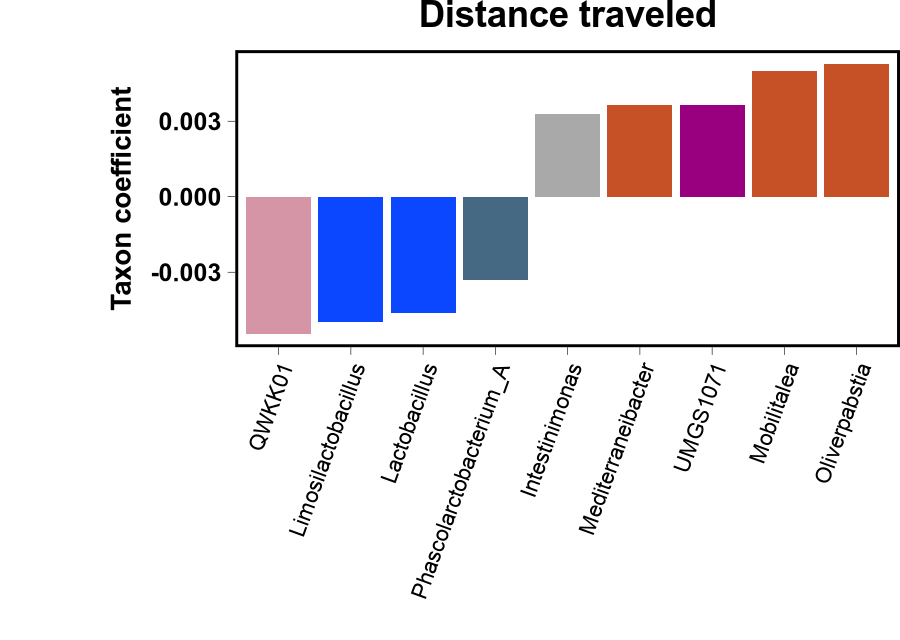

In [46]:
p.dims(4.5, 3.2)
ggarrange(pics[["dist_trav_Genus_bracken"]], ncol=1, nrow = 1)

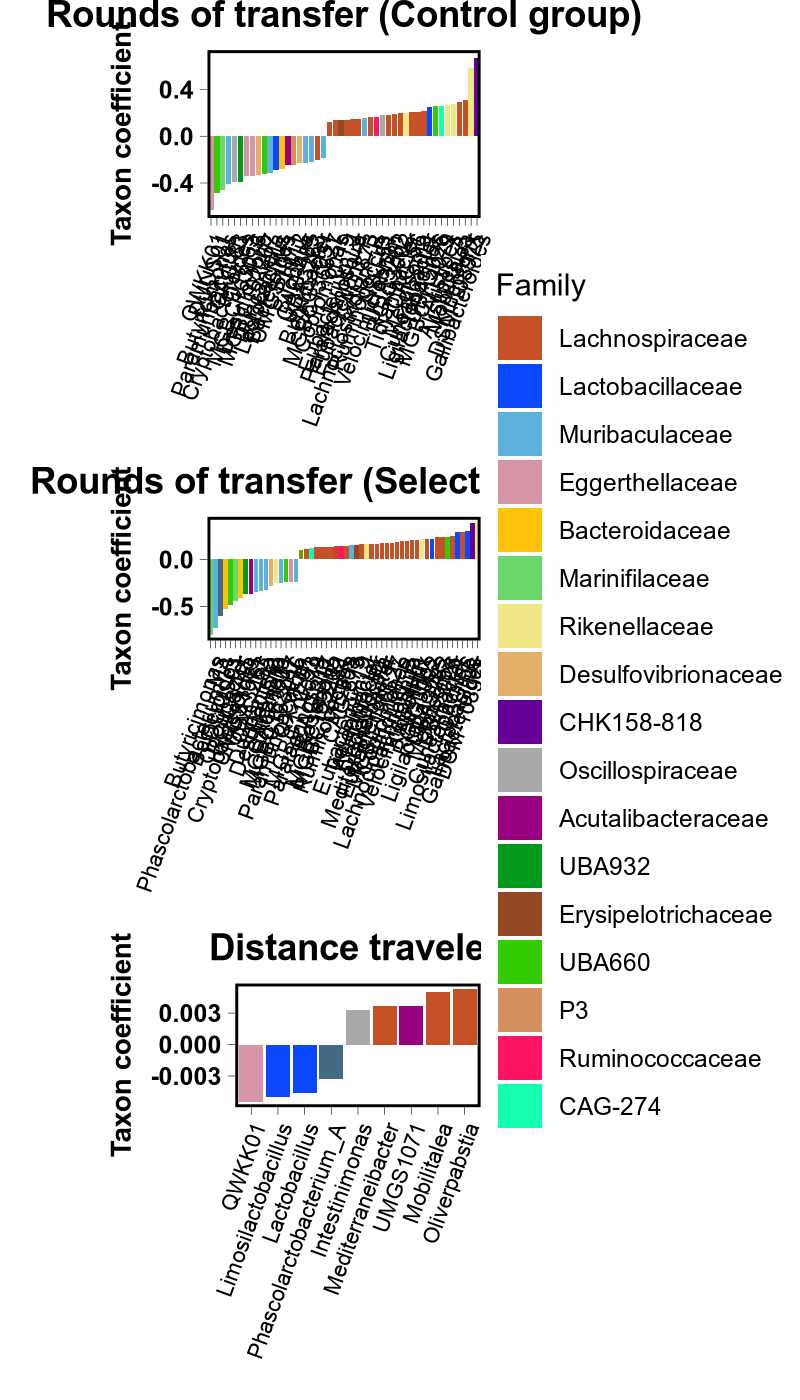

In [47]:
p.dims(4, 7)
ggarrange(pics[["Generation_num_Control_Genus_bracken"]], pics[["Generation_num_Selection_Genus_bracken"]], 
    pics[["dist_trav_Genus_bracken"]], legend = "right", common.legend = TRUE, ncol=1, nrow = 3)

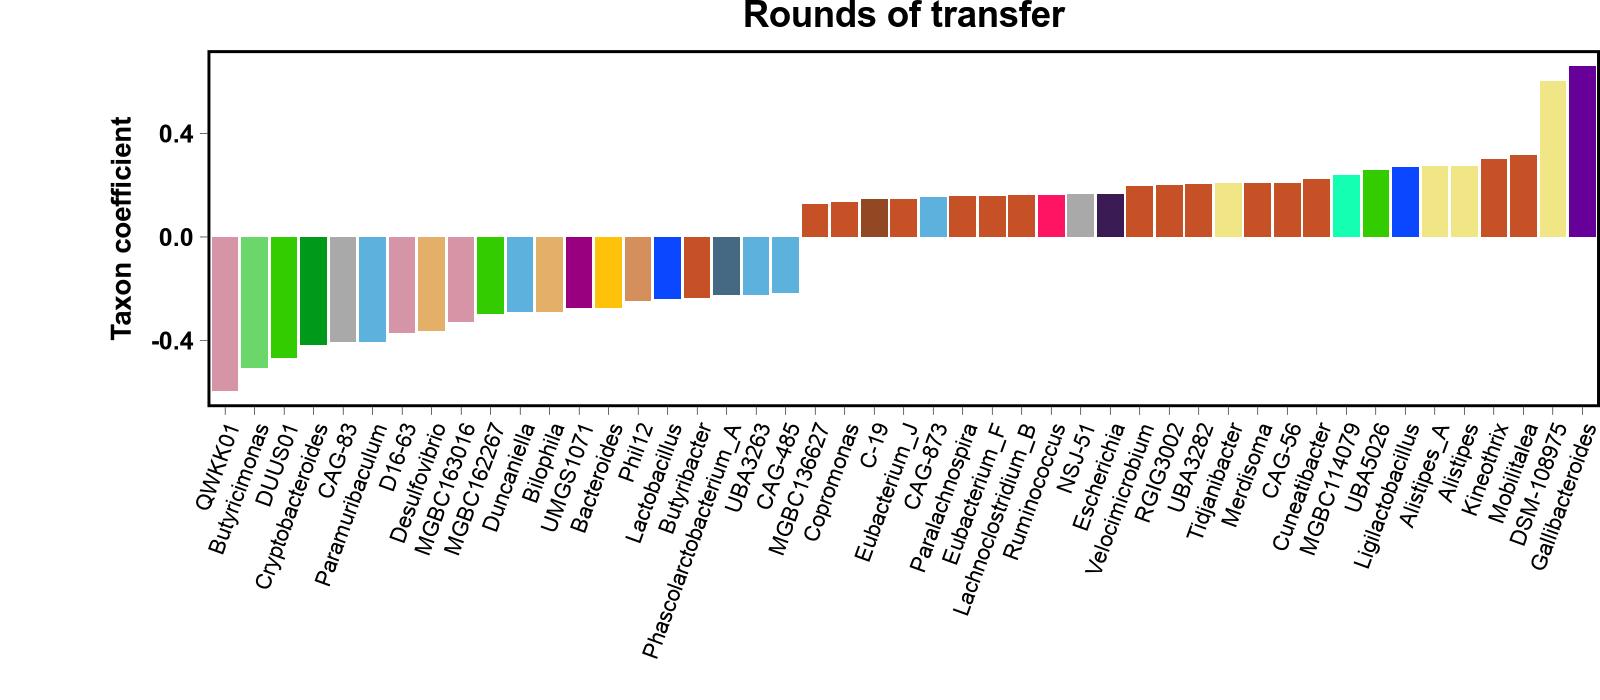

In [48]:
p.dims(8, 3.5)
ggarrange(pics[["Generation_num_Genus_bracken"]], ncol=1, nrow=1)

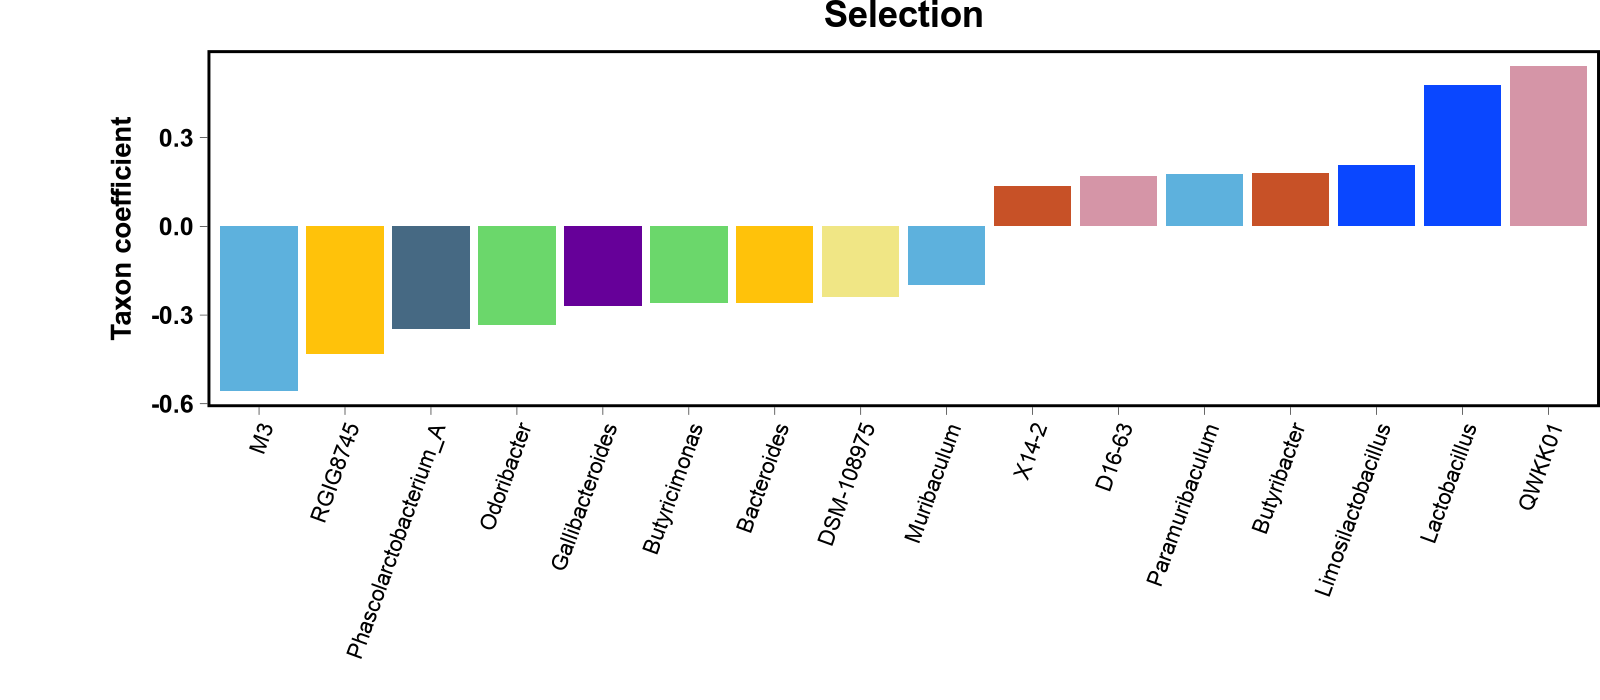

In [49]:
#p.dims(8, 2.5)
p.dims(8, 3.5)
ggarrange(pics[["Generation_num_TreatmentID_Genus_bracken"]], ncol=1, nrow=1)

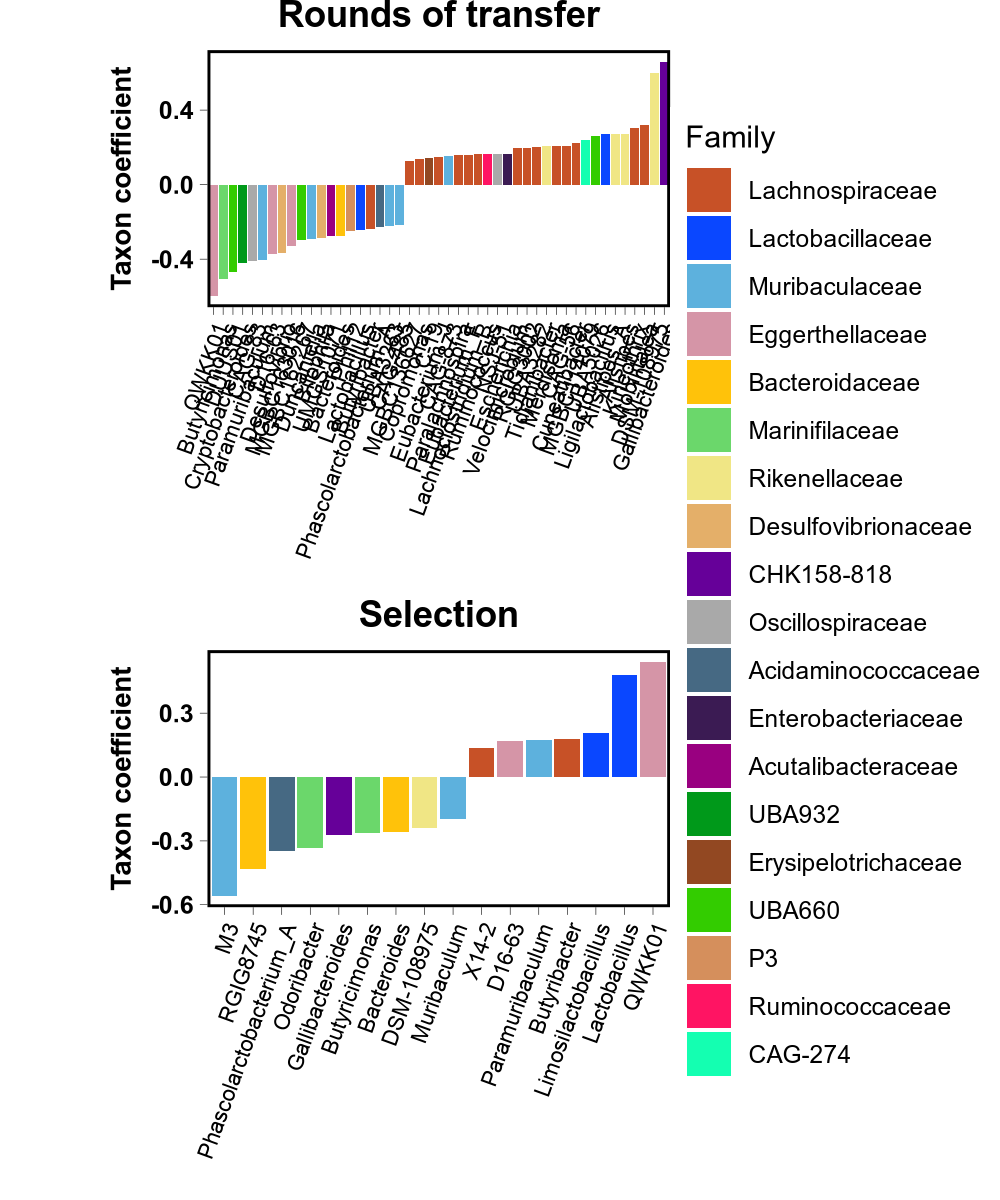

In [50]:
# - just for the legend:
p.dims(5, 6)
ggarrange(pics[["Generation_num_Genus_bracken"]], 
    pics[["Generation_num_TreatmentID_Genus_bracken"]], ncol=1, nrow=2, 
    legend = "right", common.legend = TRUE)


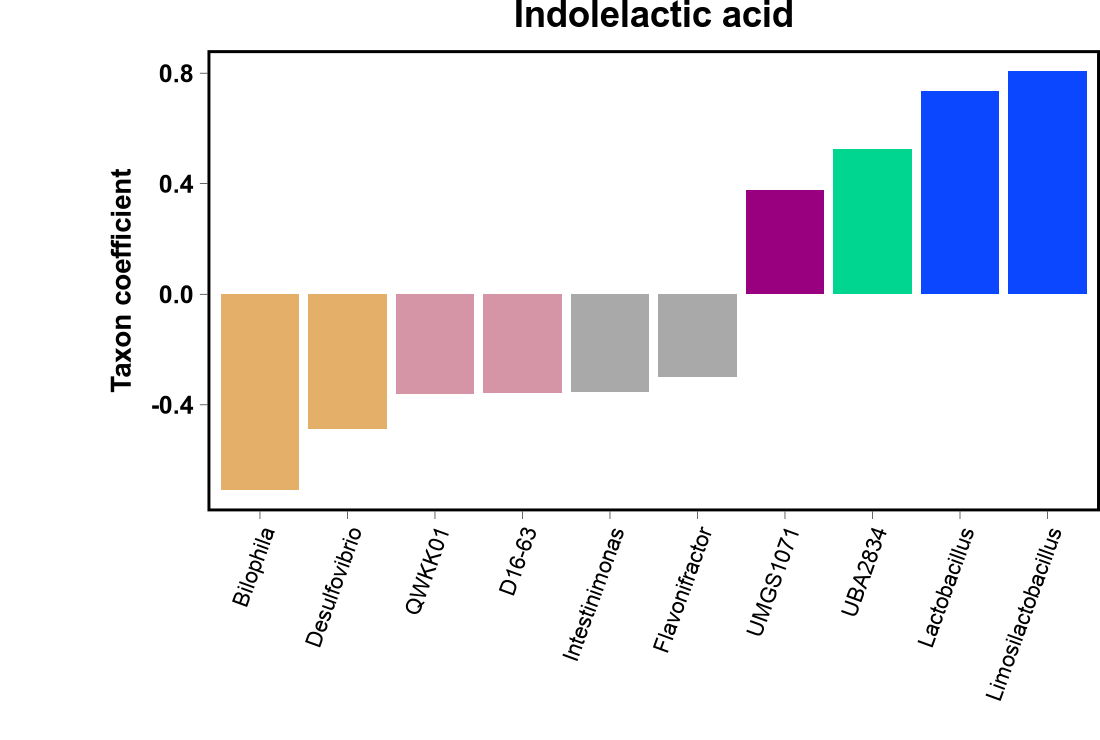

In [51]:
# ILA - Bracken
p.dims(5.5, 3.7)
ggarrange(pics[["Indolelactic_acid_Genus_bracken"]], ncol=1, nrow=1) #, legend="right")


### krakenuniq, Species

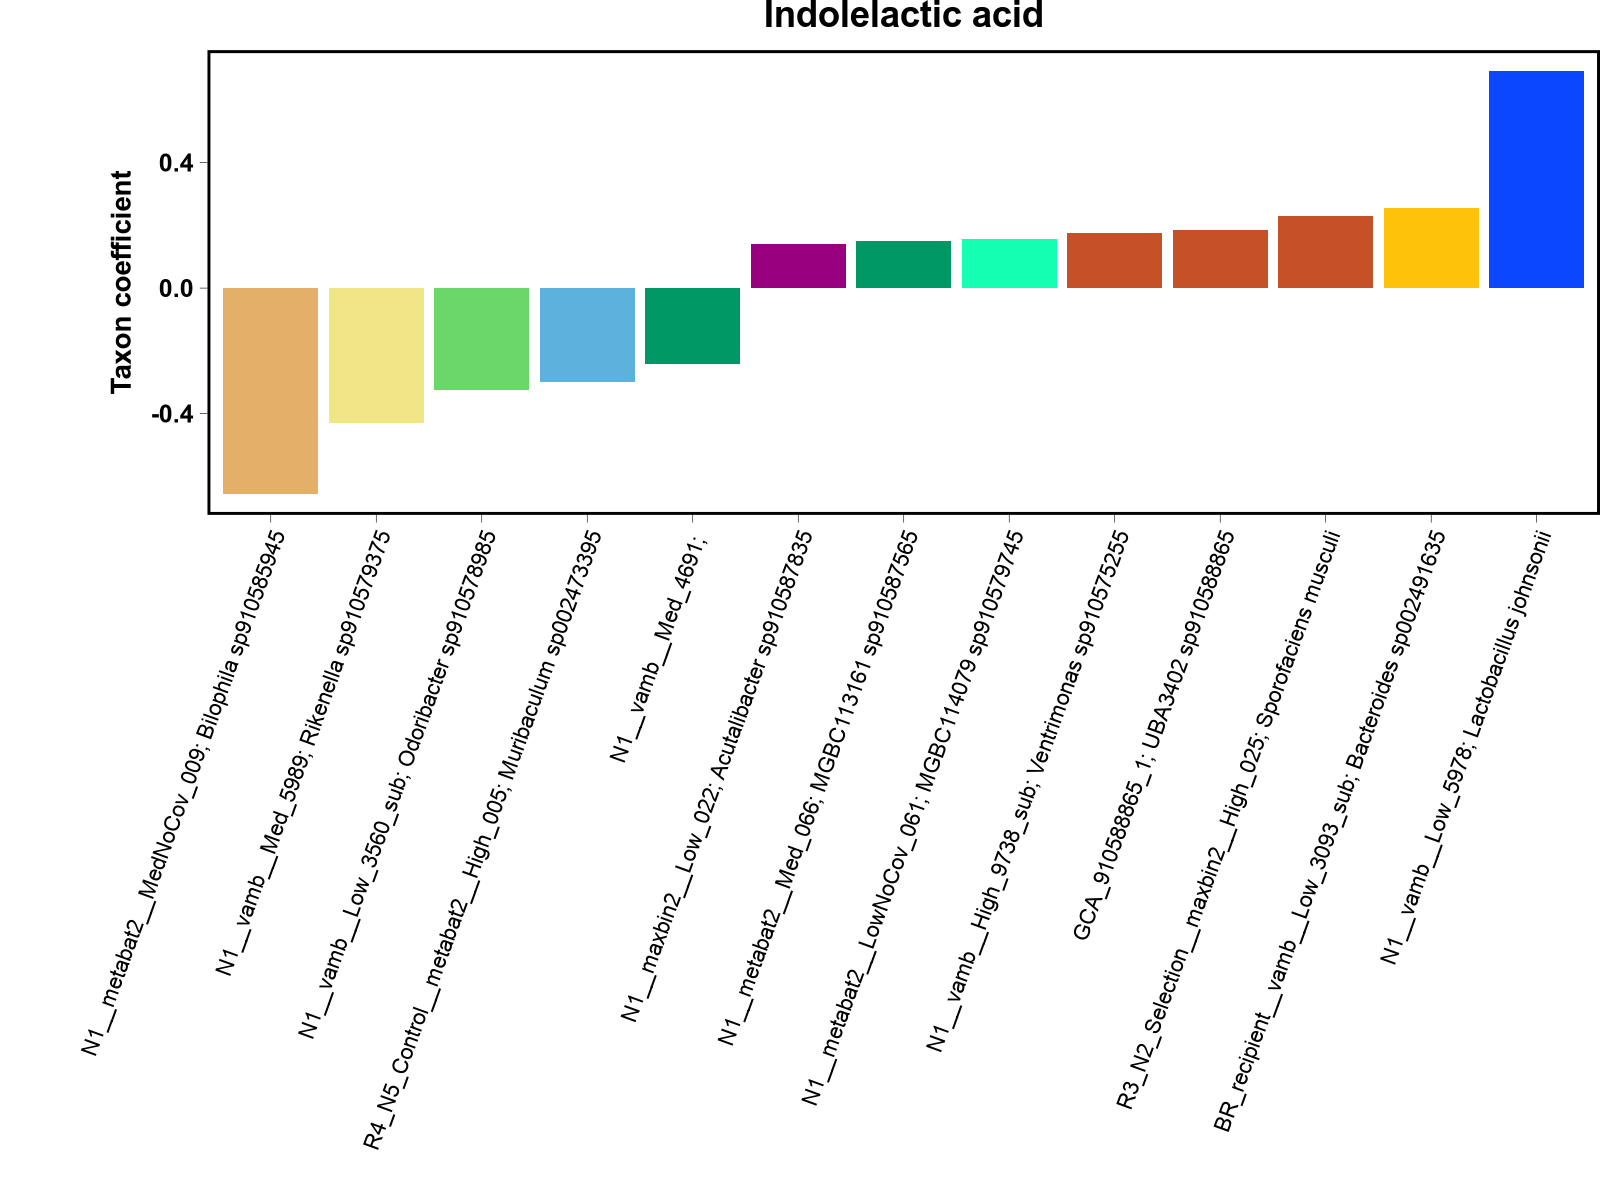

In [52]:
# ILA - Krakenuniq
# For this very combo, the angle of X axis labels can be adjusted in the function above
p.dims(8, 6)
ggarrange(pics[["Indolelactic_acid_Species_krakenuniq"]], ncol=1, nrow=1) #, common.legend = TRUE, legend="right")


### bracken, Species

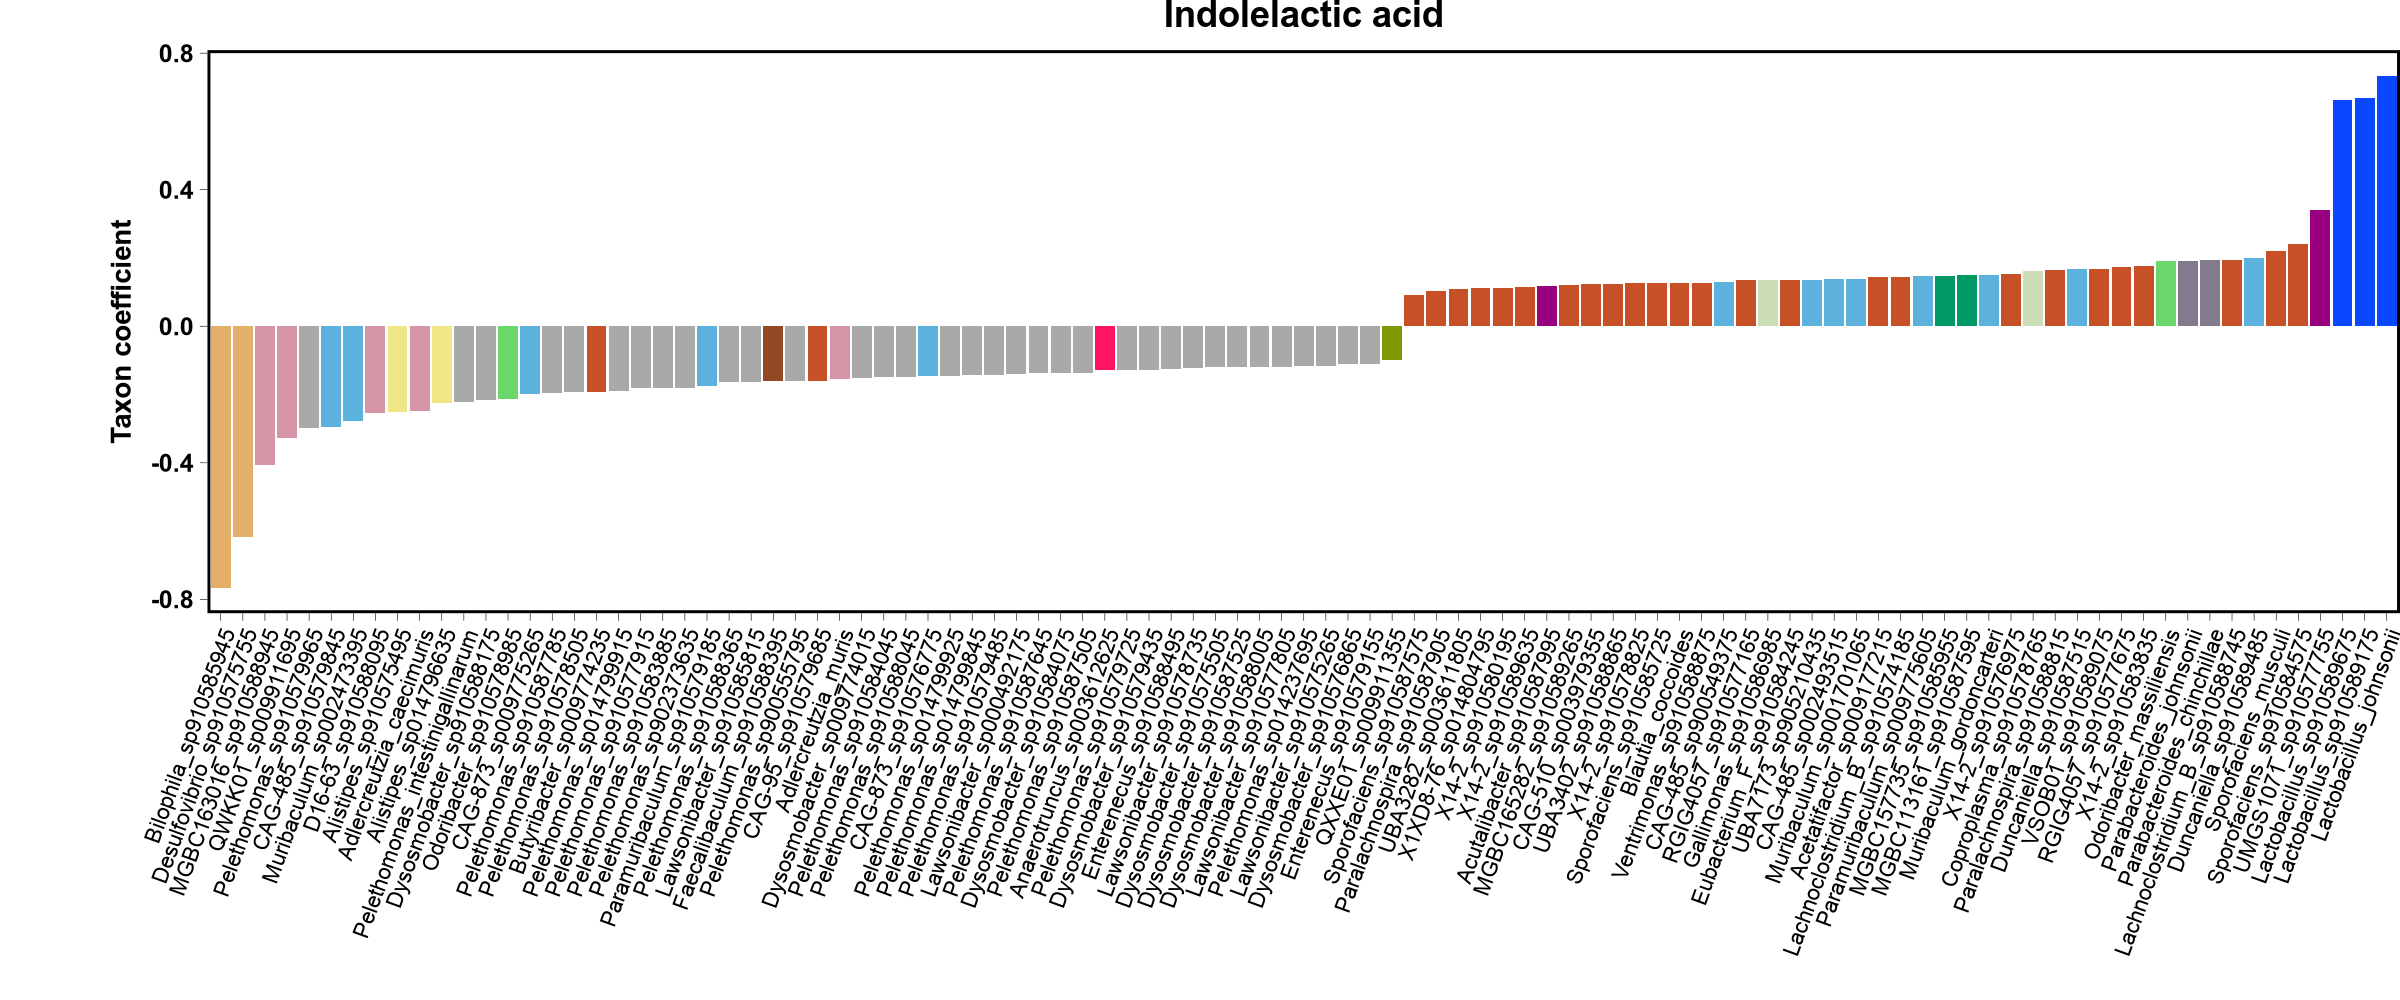

In [53]:
p.dims(12, 5)
ggarrange(pics[["Indolelactic_acid_Species_bracken"]], ncol=1, nrow=1) #, legend="right")


## Tables

In [54]:
# do it for bracken profiles and Krakenuniq as well.
df_list_nb_reprod_coef_allRanks = list()
for(curp in ALL_USED_TAXONOMIC_PROFILING) {
    for(curt in rev(ALL_USED_TAXONOMIC_LEVELS)) {
        if(curp == "krakenuniq" & curt == "Genus") {
            next
        }
        for(sel_factor_nam in names(qfactors_plots_n_tables)) {
            sheet_name = paste0(sel_factor_nam, "_", curt, "_", curp)
            
            sheet_name = gsub("_bracken", "_br", sheet_name)
            sheet_name = gsub("_krakenuniq", "_ku", sheet_name)
            sheet_name = gsub("(Selection group)", "(Sel)", fixed = TRUE, sheet_name)
            sheet_name = gsub("(Control group)", "(Ctrl)", fixed = TRUE, sheet_name)
            sheet_name = gsub("Rounds of transfer", "Rounds of tr.", fixed = TRUE, sheet_name)

            print(sheet_name)

            el = readRDS(file.path(work_dir, "out/NB", paste0("NB_Exp_2_coef_", qfactors_plots_n_tables[[sel_factor_nam]], "_", curt, "_", curp, ".rds"))) %>% 
                arrange(desc(lm_coef)) %>% 
                select(taxName_ext, lm_coef, reprod, Family) %>% 
                rename(Taxon = "taxName_ext", Family = "Family", "Taxon coefficient" = lm_coef, "Reproducibility" = reprod) 
            # add el to df_list_nb_reprod_coef_allRanks under the name of sel_factor _ curt
            df_list_nb_reprod_coef_allRanks[[sheet_name]] = el
        }
    }
}

[1] "Rounds of tr._Genus_br"
[1] "Rounds of tr. (Sel)_Genus_br"
[1] "Rounds of tr. (Ctrl)_Genus_br"
[1] "Selection_Genus_br"
[1] "Distance traveled_Genus_br"
[1] "Indolelactic acid_Genus_br"
[1] "Rounds of tr._Species_br"
[1] "Rounds of tr. (Sel)_Species_br"
[1] "Rounds of tr. (Ctrl)_Species_br"
[1] "Selection_Species_br"
[1] "Distance traveled_Species_br"
[1] "Indolelactic acid_Species_br"
[1] "Rounds of tr._Species_ku"
[1] "Rounds of tr. (Sel)_Species_ku"
[1] "Rounds of tr. (Ctrl)_Species_ku"
[1] "Selection_Species_ku"
[1] "Distance traveled_Species_ku"
[1] "Indolelactic acid_Species_ku"


In [55]:
# write list_nb_reprod_coef_allRanks into multi-sheet xls, with auto column width
openxlsx::write.xlsx(df_list_nb_reprod_coef_allRanks, file.path(work_dir, "out", "Suppl_Table_NB_all.xlsx"), colWidths="auto")